In [9]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 6.2 MB/s eta 0:00:00


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Imporing Required Libraries

import pandas as pd
import numpy as np
import os
import tarfile
import cv2
import pandas as pd
import numpy as np
import gc
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.metrics import fbeta_score
from tqdm import tqdm
import tensorflow as tf
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, InputLayer, Dense , Dropout , Flatten, Conv2D, MaxPooling2D , BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, History, TensorBoard
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.backend import clear_session
import tensorflow_addons as tfa
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [12]:
# Specify the path to the tar file
tar_path = '/content/drive/MyDrive/Hamoye/planet-understanding-the-amazon-from-space/train-jpg.tar'

# Specify the directory to extract the images
extract_dir = 'data_path/'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Open the tar file
with tarfile.open(tar_path, 'r') as tar:
    # Extract all contents to the specified directory
    tar.extractall(path=extract_dir)

print(f"Images extracted to {extract_dir}")

Images extracted to data_path/


In [13]:
# Specify the path to the tar file
tar_path2 = '/content/drive/MyDrive/Hamoye/planet-understanding-the-amazon-from-space/test-jpg.tar'

# Specify the directory to extract the images
extract_dir2 = 'data_path/'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir2, exist_ok=True)

# Open the tar file
with tarfile.open(tar_path2, 'r') as tar:
    # Extract all contents to the specified directory
    tar.extractall(path=extract_dir2)

print(f"Images extracted to {extract_dir2}")

Images extracted to data_path/


In [14]:
# Specify the path to the tar file
tar_path3 = '/content/drive/MyDrive/Hamoye/planet-understanding-the-amazon-from-space/test-jpg-additional.tar'

# Specify the directory to extract the images
extract_dir3 = 'data_path/'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir3, exist_ok=True)

# Open the tar file
with tarfile.open(tar_path3, 'r') as tar:
    # Extract all contents to the specified directory
    tar.extractall(path=extract_dir3)

print(f"Images extracted to {extract_dir3}")

Images extracted to data_path/


In [ ]:
'''import glob

# Specify the pattern to match image files
image_pattern = os.path.join(extract_dir, '*.jpg')

# Load images using OpenCV
images = [cv2.imread(img) for img in glob.glob(image_pattern)]

# Display the number of images loaded
print(f"Number of images loaded: {len(images)}")
'''

'import glob\n\n# Specify the pattern to match image files\nimage_pattern = os.path.join(extract_dir, \'*.jpg\')\n\n# Load images using OpenCV\nimages = [cv2.imread(img) for img in glob.glob(image_pattern)]\n\n# Display the number of images loaded\nprint(f"Number of images loaded: {len(images)}")\n'

In [ ]:
'''PATH = Path('/content/drive/MyDrive/Hamo../planet-understanding-the-amazon-from-space/train-jpg')
#TEST = Path('/content/path/train-jpg')
TRAIN = Path('/content/data_path/train-jpg')'''

"PATH = Path('/content/drive/MyDrive/Hamo../planet-understanding-the-amazon-from-space/train-jpg')\n#TEST = Path('/content/path/train-jpg')\nTRAIN = Path('/content/data_path/train-jpg')"

In [ ]:
'''path = "./"
os.listdir(path)'''

'path = "./"\nos.listdir(path)'

In [ ]:
'''train_label = pd.read_csv('/content/drive/MyDrive/Hamoye/planet-understanding-the-amazon-from-space/train_v2.csv/train_v2.csv')
train_label.head()'''

"train_label = pd.read_csv('/content/drive/MyDrive/Hamoye/planet-understanding-the-amazon-from-space/train_v2.csv/train_v2.csv')\ntrain_label.head()"

In [ ]:
'''labels = set()
def splitting_tags(tags):
 #  ''
    Takes in tags column, splits the tags and store as a set
 #   ''
    [labels.add(tag) for tag in tags.split()]

# Create a copy of train_label
train = train_label.copy()
train['tags'].apply(splitting_tags)
labels = list(labels)
print(labels)'''

"labels = set()\ndef splitting_tags(tags):\n #  ''\n    Takes in tags column, splits the tags and store as a set\n #   ''\n    [labels.add(tag) for tag in tags.split()]\n\n# Create a copy of train_label\ntrain = train_label.copy()\ntrain['tags'].apply(splitting_tags)\nlabels = list(labels)\nprint(labels)"

In [ ]:
'''len(labels)'''

'len(labels)'

In [ ]:
'''##One hot encoding is performed on the labels in train classes

for tag in labels:
    train[tag] = train['tags'].apply(lambda x: 1 if tag in x.split() else 0)

## adding .jpg extension to the column image_name so as to have same name format as the image files
train['image_name'] = train['image_name'].apply(lambda x: '{}.jpg'.format(x))
train.head()'''

"##One hot encoding is performed on the labels in train classes\n\nfor tag in labels:\n    train[tag] = train['tags'].apply(lambda x: 1 if tag in x.split() else 0)\n\n## adding .jpg extension to the column image_name so as to have same name format as the image files\ntrain['image_name'] = train['image_name'].apply(lambda x: '{}.jpg'.format(x))\ntrain.head()"

In [ ]:
'''# Defining the columns,i.e the labels that were newly added to the train_classes via hot encoding.
columns = list(train.columns[2:])
columns'''

'# Defining the columns,i.e the labels that were newly added to the train_classes via hot encoding.\ncolumns = list(train.columns[2:])\ncolumns'

In [ ]:
'''def fbeta(y_true, y_pred, beta = 2, epsilon = 1e-4):
    ''
    Set y_true and y_pred

    Args:
        y_true: correct target values
        Y_pred: predicted values returned by the classifer
        beta = 2
        epsilon= 1e-4

    Returns:
        fbeta score
    ''

    beta_squared = beta**2

    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.greater(tf.cast(y_pred, tf.float32), tf.constant(0.5)), tf.float32)

    tp = tf.reduce_sum(y_true * y_pred, axis = 1)
    fp = tf.reduce_sum(y_pred, axis = 1) - tp
    fn = tf.reduce_sum(y_true, axis = 1) - tp

    precision = tp/(tp+fp+epsilon)
    recall = tp/(tp+fn+epsilon)

    fb = (1+beta_squared)*precision*recall / (beta_squared*precision+recall+epsilon)
    return fb'''

"def fbeta(y_true, y_pred, beta = 2, epsilon = 1e-4):\n    ''\n    Set y_true and y_pred\n\n    Args:\n        y_true: correct target values\n        Y_pred: predicted values returned by the classifer\n        beta = 2\n        epsilon= 1e-4\n\n    Returns:\n        fbeta score\n    ''\n\n    beta_squared = beta**2\n\n    y_true = tf.cast(y_true, tf.float32)\n    y_pred = tf.cast(tf.greater(tf.cast(y_pred, tf.float32), tf.constant(0.5)), tf.float32)\n\n    tp = tf.reduce_sum(y_true * y_pred, axis = 1)\n    fp = tf.reduce_sum(y_pred, axis = 1) - tp\n    fn = tf.reduce_sum(y_true, axis = 1) - tp\n\n    precision = tp/(tp+fp+epsilon)\n    recall = tp/(tp+fn+epsilon)\n\n    fb = (1+beta_squared)*precision*recall / (beta_squared*precision+recall+epsilon)\n    return fb"

In [ ]:
'''def multi_label_acc(y_true, y_pred, epsilon = 1e-4):
    ''
    Retuns accuracy value for multi_label classification

    Set y_true and y_pred

    Args:
        y_true: correct target values
        Y_pred: predicted values returned by the classifer
        epsilon= 1e-4

    Returns:
        Accuracy score
    ''
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.greater(tf.cast(y_pred, tf.float32), tf.constant(0.5)), tf.float32)

    tp = tf.reduce_sum(y_true * y_pred, axis = 1)
    fp = tf.reduce_sum(y_pred, axis = 1) - tp
    fn = tf.reduce_sum(y_true, axis = 1) - tp

    y_true = tf.cast(y_true, tf.bool)
    y_pred = tf.cast(y_pred, tf.bool)

    tn = tf.reduce_sum(tf.cast(tf.logical_not(y_true), tf.float32)
                       * tf.cast(tf.logical_not(y_pred), tf.float32), axis = 1)

    return (tp+tn)/(tp+tn+fp+fn+epsilon)'''

"def multi_label_acc(y_true, y_pred, epsilon = 1e-4):\n    ''\n    Retuns accuracy value for multi_label classification\n\n    Set y_true and y_pred\n\n    Args:\n        y_true: correct target values\n        Y_pred: predicted values returned by the classifer\n        epsilon= 1e-4\n\n    Returns:\n        Accuracy score\n    ''\n    y_true = tf.cast(y_true, tf.float32)\n    y_pred = tf.cast(tf.greater(tf.cast(y_pred, tf.float32), tf.constant(0.5)), tf.float32)\n\n    tp = tf.reduce_sum(y_true * y_pred, axis = 1)\n    fp = tf.reduce_sum(y_pred, axis = 1) - tp\n    fn = tf.reduce_sum(y_true, axis = 1) - tp\n\n    y_true = tf.cast(y_true, tf.bool)\n    y_pred = tf.cast(y_pred, tf.bool)\n\n    tn = tf.reduce_sum(tf.cast(tf.logical_not(y_true), tf.float32)\n                       * tf.cast(tf.logical_not(y_pred), tf.float32), axis = 1)\n\n    return (tp+tn)/(tp+tn+fp+fn+epsilon)"

In [ ]:
'''#defining our model

def build_model():
    model = Sequential()
    model.add(BatchNormalization(input_shape=(128, 128, 3)))
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(17, activation='sigmoid'))

    opt = Adam(learning_rate=0.01)

    # We need binary here, since categorical_crossentropy l1 norms the output before calculating loss.
    model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=[multi_label_acc, fbeta])

    return model
'''

"#defining our model\n\ndef build_model():\n    model = Sequential()\n    model.add(BatchNormalization(input_shape=(128, 128, 3)))\n    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))\n    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))\n    model.add(MaxPooling2D(pool_size=(2, 2)))\n    model.add(Dropout(0.2))\n\n    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))\n    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))\n    model.add(MaxPooling2D(pool_size=(2, 2)))\n    model.add(Dropout(0.2))\n\n    model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))\n    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))\n    model.add(MaxPooling2D(pool_size=(2, 2)))\n    model.add(Dropout(0.2))\n\n    model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))\n    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))\n    model.add(MaxPooling2D(pool_size=(

In [ ]:
'''#modelcheckpoint is set to monitor the model using validation fbeta score and save the best only
save_best_check_point = ModelCheckpoint(filepath = 'best_model.hdf5',
                                        monitor = 'val_fbeta',
                                        mode = 'max',
                                        save_best_only = True,
                                        save_weights_only = True)'''

"#modelcheckpoint is set to monitor the model using validation fbeta score and save the best only\nsave_best_check_point = ModelCheckpoint(filepath = 'best_model.hdf5',\n                                        monitor = 'val_fbeta',\n                                        mode = 'max',\n                                        save_best_only = True,\n                                        save_weights_only = True)"

In [ ]:
'''#initializing imagedatagenerator with a validation split of 0.2
train_image_gen = ImageDataGenerator(rescale = 1/255, validation_split = 0.3)

#generating train data generator which is 80% of the train dataset
#note that a generator contains both features and target of the data
train_generator = train_image_gen.flow_from_dataframe(dataframe=train,
                                                directory ="/content/data_path/train-jpg",
                                                x_col="image_name", y_col=columns, subset="training",
                                                batch_size=16,seed=2021, shuffle=True,
                                                class_mode="raw", target_size=(128,128))

#generating validation data which is expected to be 20% of the train dataset since validation split is 0.2
val_generator = train_image_gen.flow_from_dataframe(dataframe=train,
                                                directory ="/content/data_path/train-jpg",
                                                x_col="image_name", y_col=columns, subset="validation",
                                                batch_size=16,seed=2021, shuffle=True,
                                                class_mode="raw", target_size=(128,128))'''

'#initializing imagedatagenerator with a validation split of 0.2\ntrain_image_gen = ImageDataGenerator(rescale = 1/255, validation_split = 0.3)\n\n#generating train data generator which is 80% of the train dataset\n#note that a generator contains both features and target of the data\ntrain_generator = train_image_gen.flow_from_dataframe(dataframe=train,\n                                                directory ="/content/data_path/train-jpg",\n                                                x_col="image_name", y_col=columns, subset="training",\n                                                batch_size=16,seed=2021, shuffle=True,\n                                                class_mode="raw", target_size=(128,128))\n\n#generating validation data which is expected to be 20% of the train dataset since validation split is 0.2\nval_generator = train_image_gen.flow_from_dataframe(dataframe=train,\n                                                directory ="/content/data_path/train-jpg",

In [ ]:
'''#setting up step size for training and validation image data
step_train_size = int(np.ceil(train_generator.samples / train_generator.batch_size))
step_val_size = int(np.ceil(val_generator.samples / val_generator.batch_size))
print(step_train_size)
print(step_val_size)'''

1771
759


In [ ]:
'''#initialize the model
model1 = build_model()'''

'#initialize the model\nmodel1 = build_model()'

In [ ]:
'''# Preview the model architecture
model1.summary()'''

'# Preview the model architecture\nmodel1.summary()'

In [ ]:
'''#fitting our model using the parameters already defined
model1.fit(x = train_generator,
           steps_per_epoch = step_train_size,
           validation_data = val_generator,
           validation_steps = step_val_size,epochs = 15,
           callbacks=[save_best_check_point])'''

'#fitting our model using the parameters already defined\nmodel1.fit(x = train_generator,\n           steps_per_epoch = step_train_size,\n           validation_data = val_generator,\n           validation_steps = step_val_size,epochs = 15,\n           callbacks=[save_best_check_point])'

In [ ]:
'''#initializing a second model to make predictions
model2 = build_model()'''

'#initializing a second model to make predictions\nmodel2 = build_model()'

In [ ]:
'''#loading in the weights of the trained model
model2.load_weights('best_model.hdf5')'''

"#loading in the weights of the trained model\nmodel2.load_weights('best_model.hdf5')"

In [ ]:
'''##adding .jpg extension to image name in the sample submission file
sample_submission = pd.read_csv('/kaggle/input/planets-dataset/planet/planet/sample_submission.csv')
sample_submission1 = sample_submission.copy()
sample_submission1['image_name'] = sample_submission1['image_name'].apply(lambda x: '{}.jpg'.format(x))
sample_submission1.head()'''

"##adding .jpg extension to image name in the sample submission file\nsample_submission = pd.read_csv('/kaggle/input/planets-dataset/planet/planet/sample_submission.csv')\nsample_submission1 = sample_submission.copy()\nsample_submission1['image_name'] = sample_submission1['image_name'].apply(lambda x: '{}.jpg'.format(x))\nsample_submission1.head()"

In [ ]:
'''# Divide the sample submission file into two splits,
# first test_df which contains the first 40669 images
test_df = sample_submission1.iloc[:40669]['image_name'].reset_index().drop('index', axis =1)
test_df.head()'''

"# Divide the sample submission file into two splits,\n# first test_df which contains the first 40669 images\ntest_df = sample_submission1.iloc[:40669]['image_name'].reset_index().drop('index', axis =1)\ntest_df.head()"

In [ ]:
'''#initialize imagedatagenerator for the test images and also rescaling
test_image_gen = ImageDataGenerator(rescale = 1/255)

#creating a generator for the images found in the first test image files
test_generator = test_image_gen.flow_from_dataframe(dataframe=test_df,
                                                directory="/kaggle/input/planets-dataset/planet/planet/test-jpg",
                                                x_col="image_name",
                                                y_col=None,
                                                batch_size=16,
                                                shuffle=False,
                                                class_mode=None,
                                                target_size=(128,128))

step_test_size = int(np.ceil(test_generator.samples/test_generator.batch_size))'''

'#initialize imagedatagenerator for the test images and also rescaling\ntest_image_gen = ImageDataGenerator(rescale = 1/255)\n\n#creating a generator for the images found in the first test image files\ntest_generator = test_image_gen.flow_from_dataframe(dataframe=test_df,\n                                                directory="/kaggle/input/planets-dataset/planet/planet/test-jpg",\n                                                x_col="image_name",\n                                                y_col=None,\n                                                batch_size=16,\n                                                shuffle=False,\n                                                class_mode=None,\n                                                target_size=(128,128))\n\nstep_test_size = int(np.ceil(test_generator.samples/test_generator.batch_size))'

In [ ]:
'''#first, we reset the test generator to avoid shuffling of index as we want it to be orderly
test_generator.reset()
pred = model2.predict(test_generator, steps = step_test_size, verbose = 1)'''

'#first, we reset the test generator to avoid shuffling of index as we want it to be orderly\ntest_generator.reset()\npred = model2.predict(test_generator, steps = step_test_size, verbose = 1)'

In [ ]:
'''#additional test dataset
add_test_df = sample_submission1.iloc[40669:]['image_name'].reset_index().drop('index', axis =1)
add_test_df.head()'''

"#additional test dataset\nadd_test_df = sample_submission1.iloc[40669:]['image_name'].reset_index().drop('index', axis =1)\nadd_test_df.head()"

In [ ]:
'''#creating a generator for the additional test image files
add_test_generator = test_image_gen.flow_from_dataframe(dataframe = add_test_df,
                                                    directory ="/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional",
                                                    x_col="image_name",
                                                    y_col=None,
                                                    batch_size=16,
                                                    shuffle=False,
                                                    class_mode=None,
                                                    target_size=(128,128))


step_test_size2 = int(np.ceil(add_test_generator.samples/add_test_generator.batch_size))'''

'#creating a generator for the additional test image files\nadd_test_generator = test_image_gen.flow_from_dataframe(dataframe = add_test_df,\n                                                    directory ="/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional",\n                                                    x_col="image_name",\n                                                    y_col=None,\n                                                    batch_size=16,\n                                                    shuffle=False,\n                                                    class_mode=None,\n                                                    target_size=(128,128))\n\n\nstep_test_size2 = int(np.ceil(add_test_generator.samples/add_test_generator.batch_size))'

In [ ]:
'''#we reset the generator to avoid shuffling, then make prediction on the generator
add_test_generator.reset()
add_pred = model2.predict(add_test_generator, steps = step_test_size2, verbose = 1)'''

'#we reset the generator to avoid shuffling, then make prediction on the generator\nadd_test_generator.reset()\nadd_pred = model2.predict(add_test_generator, steps = step_test_size2, verbose = 1)'

In [ ]:
'''#this is to get the filenames in the generator using the attribute .filenames
file_names = add_test_generator.filenames

#convert the predicted values to a dataframe and join two labels together if the probability of occurrance
#of the label is greater than 0.5
add_pred_tags = pd.DataFrame(add_pred)
add_pred_tags = add_pred_tags.apply(lambda x: ''.join(np.array(labels)[x>0.5]), axis = 1)

#then the result should look like this
result2 = pd.DataFrame({'image_name': file_names, 'tags': add_pred_tags})
result2.head()'''

In [ ]:
'''#for the final result of the predicted tags for the test images,
# we need to concat the first and second results in
#that order to avoid shuffling the index
last_result = pd.concat([result1, result2])

last_result = last_result.reset_index().drop('index', axis =1)

print(last_result.shape)
#print the final result
last_result.head()'''

In [ ]:
'''#we need to remove the .jpg extension from the image_name of the
# last_result because from the sample submission the
#extension was not there, we added it for easy manipulation of the data.
last_result['image_name'] = last_result['image_name'].apply(lambda x: x[:-4])
last_result.head()'''

In [ ]:
'''# Finally, we save the result to a csv file using the .to_csv()
# method and setting the index to false.
last_result.to_csv('submission1.csv', index = False)'''

### note2

In [ ]:
'''INPUT_SHAPE = (128, 128, 3) # Image Dimensions
BATCH_SIZE = 128
DROPOUT_RATE = 0.5
EPOCHS = 15
LR = 0.0001 # Learning Rate
REG_STRENGTH = 0.01 # Regularization Strength
NFOLDS = 2 # No of folds for cross validation
WORKERS = 4 # Multithreading no of threads
MAXQ = 10 # Max Queue size for multithreading
THRES = [0.2] * 17 # Threshold for truth value of label, applied on sigmoid output.

TRAIN_PATH = '/content/data_path/train-jpg'
TEST_PATH = '/content/data_path/test-jpg'

TRAIN_CSV_PATH = '/content/drive/MyDrive/Hamoye/planet-understanding-the-amazon-from-space/train_v2.csv/train_v2.csv'
TEST_CSV_PATH = '/content/drive/MyDrive/Hamoye/planet-understanding-the-amazon-from-space/sample_submission_v2.csv/sample_submission_v2.csv'''

In [15]:
INPUT_SHAPE = (128, 128, 3) # Image Dimensions
BATCH_SIZE = 128
DROPOUT_RATE = 0.5
EPOCHS = 15
LR = 0.0001 # Learning Rate
REG_STRENGTH = 0.01 # Regularization Strength
NFOLDS = 2 # No of folds for cross validation
WORKERS = 4 # Multithreading no of threads
MAXQ = 10 # Max Queue size for multithreading
THRES = [0.2] * 17 # Threshold for truth value of label, applied on sigmoid output.

TRAIN_PATH = '/content/data_path/train-jpg'
TEST_PATH = '/content/data_path/test-jpg'
test_pat = '/content/data_path/test-jpg-additional'

TRAIN_CSV_PATH = '/content/drive/MyDrive/Hamoye/planet-understanding-the-amazon-from-space/train_v2.csv/train_v2.csv'
TEST_CSV_PATH = '/content/drive/MyDrive/Hamoye/planet-understanding-the-amazon-from-space/sample_submission_v2.csv/sample_submission_v2.csv'

In [16]:
df_train = pd.read_csv(TRAIN_CSV_PATH)
df_test = pd.read_csv(TEST_CSV_PATH)


df_train['image_name'] = df_train['image_name'].astype(str) + '.jpg'
df_test['image_name'] = df_test['image_name'].astype(str) + '.jpg'


df_test['tags'] = df_test['tags'].apply(lambda x: x.split(' '))

print(df_train.head())
print('-------------------------------------------')
print(df_test.head())

X_train_files = np.array(df_train['image_name'].tolist())
X_train_files.reshape((X_train_files.shape[0], 1))

y_train = np.array(df_train['tags'].tolist())

    image_name                                       tags
0  train_0.jpg                               haze primary
1  train_1.jpg            agriculture clear primary water
2  train_2.jpg                              clear primary
3  train_3.jpg                              clear primary
4  train_4.jpg  agriculture clear habitation primary road
-------------------------------------------
   image_name                                        tags
0  test_0.jpg  [primary, clear, agriculture, road, water]
1  test_1.jpg  [primary, clear, agriculture, road, water]
2  test_2.jpg  [primary, clear, agriculture, road, water]
3  test_3.jpg  [primary, clear, agriculture, road, water]
4  test_4.jpg  [primary, clear, agriculture, road, water]


In [17]:
labels = []

for tag in df_train['tags'].values:
    labels_in_tag = tag.split(' ')
    for label in labels_in_tag:
        if label not in labels:
            labels.append(label)

labels.sort()
print(labels)

['agriculture', 'artisinal_mine', 'bare_ground', 'blooming', 'blow_down', 'clear', 'cloudy', 'conventional_mine', 'cultivation', 'habitation', 'haze', 'partly_cloudy', 'primary', 'road', 'selective_logging', 'slash_burn', 'water']


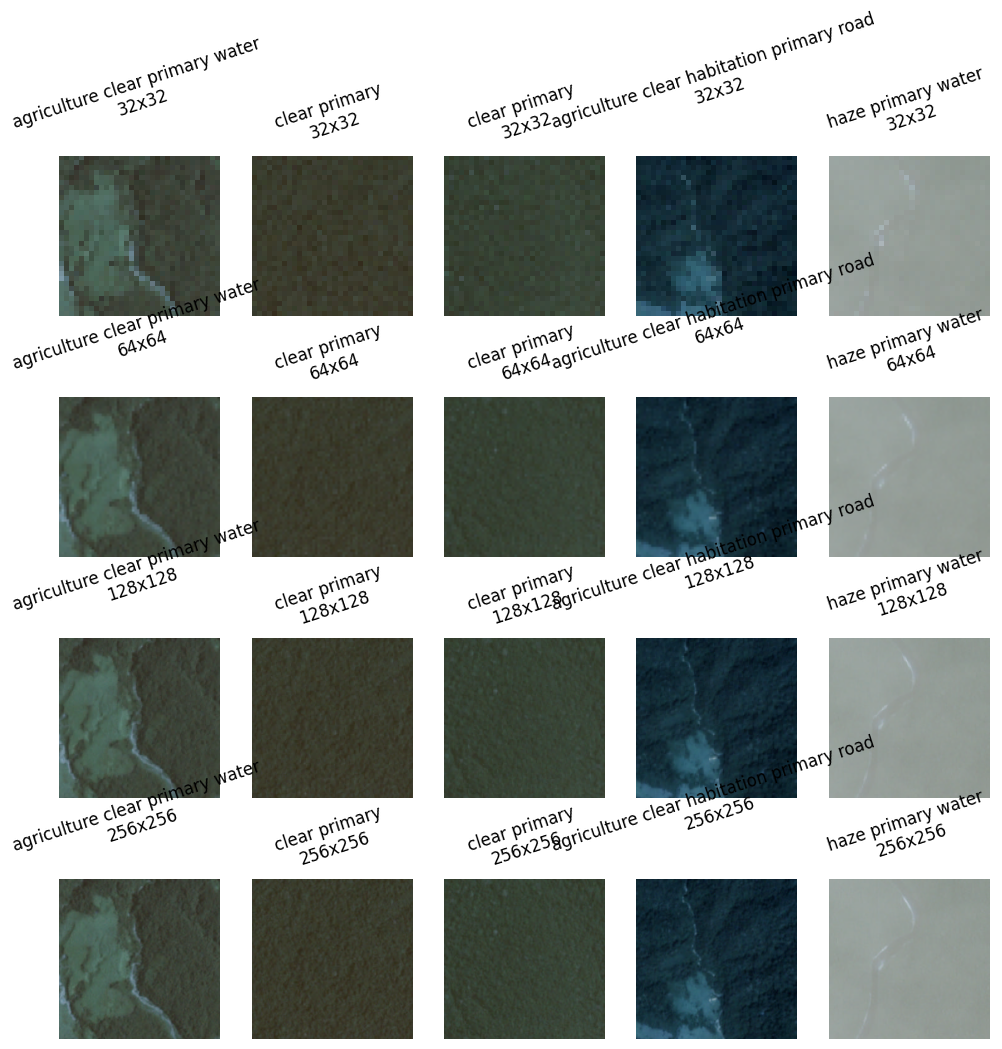

In [18]:
plt.figure(figsize=(12, 12))
res = [32, 64, 128, 256]
NIMGS = 5

for i in range(len(res)):
    for j in range(NIMGS):
        img = cv2.imread(os.path.join(TRAIN_PATH,df_train['image_name'][j+1]))
        img = cv2.resize(img, (res[i], res[i]))
        plt.subplot(len(res), NIMGS, i*NIMGS+j+1)
        plt.imshow(img)
        plt.title(df_train['tags'][j+1] + "\n" + str(res[i]) + "x" + str(res[i]), rotation=18)
        plt.axis('off')

plt.show()

In [ ]:
plt.figure(figsize=(8, 8))

labels_count = {}

for tag in df_train['tags'].values:
    labels_in_tag = tag.split(' ')
    for label in labels_in_tag:
        if label in labels_count:
            labels_count[label] += 1
        else:
            labels_count[label] = 0

min_label = min(labels_count, key=labels_count.get)
max_label = max(labels_count, key=labels_count.get)
print(min_label+" is tagged least no of times: "+str(labels_count[min_label]))
print(max_label+" is tagged max no of times: "+str(labels_count[max_label]))

plt.bar(range(len(labels_count)), list(labels_count.values()), align='center')
plt.xticks(range(len(labels_count)), list(labels_count.keys()), rotation=90)

plt.show()

In [19]:
def create_model():
    model = Sequential()
    model.add(InputLayer(INPUT_SHAPE))
    model.add(VGG16(weights='imagenet', include_top=False))
    model.add(Flatten())
    model.add(Dense(17, activation='sigmoid'))
    return model

#clear_session()

model = create_model()
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 17)                139281    
                                                                 
Total params: 14853969 (56.66 MB)
Trainable params: 14853969 (56.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
def f2_score(y_true, y_pred):
    y_true = tf.cast(y_true, "int32")
    y_pred = tf.cast(tf.round(y_pred), "int32") # implicit 0.5 threshold via tf.round
    y_correct = y_true * y_pred
    sum_true = tf.reduce_sum(y_true, axis=1)
    sum_pred = tf.reduce_sum(y_pred, axis=1)
    sum_correct = tf.reduce_sum(y_correct, axis=1)
    precision = sum_correct / sum_pred
    recall = sum_correct / sum_true
    f_score = 5 * precision * recall / (4 * precision + recall)
    f_score = tf.where(tf.math.is_nan(f_score), tf.zeros_like(f_score), f_score)
    return tf.reduce_mean(f_score)

In [16]:
num_fold = 0

y_test = []

folds = KFold(n_splits=NFOLDS, shuffle=True, random_state=1).split(X_train_files, y_train)

for train_index, val_index in folds:
    X_train_files_fold = X_train_files[train_index]
    y_train_fold = y_train[train_index]
    X_val_files_fold = X_train_files[val_index]
    y_val_fold = np.array(y_train[val_index])

    train_df = pd.DataFrame(list(zip(X_train_files_fold, y_train_fold)), columns = ['image_name', 'tags'])
    val_df = pd.DataFrame(list(zip(X_val_files_fold, y_val_fold)), columns = ['image_name', 'tags'])

    train_df['tags'] = train_df['tags'].apply(lambda x: x.split(' '))
    val_df['tags'] = val_df['tags'].apply(lambda x: x.split(' '))

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=True
    )

    train_generator = train_datagen.flow_from_dataframe(
        train_df,
        directory=TRAIN_PATH,
        x_col='image_name',
        y_col='tags',
        target_size=(INPUT_SHAPE[0], INPUT_SHAPE[1]),
        class_mode='categorical',
        batch_size=BATCH_SIZE,
        classes=labels,
    )

    val_datagen = ImageDataGenerator(
        rescale=1./255
    )

    val_generator = val_datagen.flow_from_dataframe(
        val_df,
        directory=TRAIN_PATH,
        x_col='image_name',
        y_col='tags',
        target_size=(INPUT_SHAPE[0], INPUT_SHAPE[1]),
        class_mode='categorical',
        batch_size=BATCH_SIZE,
        classes=labels,
    )

    test_datagen = ImageDataGenerator(
        rescale=1./255
    )

    test_generator = test_datagen.flow_from_dataframe(
        df_test[:40669],
        directory=TEST_PATH,
        x_col='image_name',
        y_col='tags',
        target_size=(INPUT_SHAPE[0], INPUT_SHAPE[1]),
        class_mode='categorical',
        batch_size=BATCH_SIZE,
        classes=labels,
        shuffle=False,
    )


    test2_datagen = ImageDataGenerator(
        rescale=1./255
    )

    test2_generator = test2_datagen.flow_from_dataframe(
        df_test[40669:],
        directory=test_pat,
        x_col='image_name',
        y_col='tags',
        target_size=(INPUT_SHAPE[0], INPUT_SHAPE[1]),
        class_mode='categorical',
        batch_size=BATCH_SIZE,
        classes=labels,
        shuffle=False,
    )

    model_path_of_fold = os.path.join('', 'weights_of_fold_' + str(num_fold) + '.h5')

    #clear_session()
    model = create_model()

    adam = Adam(learning_rate=LR)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=[f2_score])

    callbacks = [
        ModelCheckpoint(model_path_of_fold, monitor='val_f2_score', save_best_only=True, mode='max'),
        ReduceLROnPlateau(monitor='loss', factor=0.1, patience=3, mode='min', min_lr=0.000001)
    ]

    model.fit_generator(train_generator, epochs=EPOCHS, validation_data=val_generator, callbacks=callbacks,
                       workers=WORKERS, use_multiprocessing=True, max_queue_size=MAXQ)

    model.load_weights(model_path_of_fold)

    p_test = model.predict_generator(test_generator, workers=WORKERS, use_multiprocessing=True, max_queue_size=MAXQ)
    p_test2 = model.predict_generator(test2_generator, workers=WORKERS, use_multiprocessing=True, max_queue_size=MAXQ)
    y_test.append(p_test)
    y_test.append(p_test2)

Found 20239 validated image filenames belonging to 17 classes.
Found 20240 validated image filenames belonging to 17 classes.
Found 40669 validated image filenames belonging to 17 classes.
Found 20522 validated image filenames belonging to 17 classes.
Epoch 1/15
159/159 [==============================] - 242s 1s/step - loss: 0.1730 - f2_score: 0.7784 - val_loss: 0.1276 - val_f2_score: 0.8459 - lr: 1.0000e-04
Epoch 2/15
159/159 [==============================] - 180s 1s/step - loss: 0.1278 - f2_score: 0.8466 - val_loss: 0.1175 - val_f2_score: 0.8807 - lr: 1.0000e-04
Epoch 3/15
159/159 [==============================] - 208s 1s/step - loss: 0.1163 - f2_score: 0.8626 - val_loss: 0.1068 - val_f2_score: 0.8795 - lr: 1.0000e-04
Epoch 4/15
159/159 [==============================] - 179s 1s/step - loss: 0.1116 - f2_score: 0.8692 - val_loss: 0.1087 - val_f2_score: 0.8906 - lr: 1.0000e-04
Epoch 5/15
159/159 [==============================] - 170s 1s/step - loss: 0.1066 - f2_score: 0.8760 - val_l

In [17]:
result = np.array(y_test[0])
result = np.array(y_test[0])
for i in range(1, NFOLDS):
    result += np.array(y_test[i])
result /= NFOLDS
result = pd.DataFrame(result, columns = labels)
result.head()

ValueError: ignored

In [26]:
re1 = np.array(y_test[0])
re2 = np.array(y_test[1])
re3 = np.array(y_test[2])
re4 = np.array(y_test[3])
result_test = re1 + re3
result_test /= NFOLDS
result_test = pd.DataFrame(result_test, columns = labels)

result_add_test = re2 + re4
result_add_test /= NFOLDS
result_add_test = pd.DataFrame(result_add_test, columns = labels)


In [27]:
final = pd.concat([result_test, result_add_test], ignore_index=True)
final.reset_index(drop=True)
final.head()

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
0,0.011696,0.000011,0.000145,0.062645,0.001265,0.996971,3.202226e-06,0.000002,0.008401,0.001266,0.000768,0.001582,0.999995,0.002361,0.004714,0.000083,0.005428
1,0.021752,0.000021,0.000339,0.048529,0.008381,0.996853,8.671107e-07,0.000007,0.026028,0.001417,0.000301,0.002712,0.999999,0.001492,0.008729,0.000246,0.003513
2,0.032158,0.000158,0.000852,0.000772,0.000686,0.000021,4.681208e-04,0.000044,0.014561,0.003098,0.000195,0.999790,0.999459,0.009388,0.004276,0.000273,0.049512
3,0.812154,0.000130,0.002971,0.008801,0.002480,0.929537,7.093317e-07,0.000016,0.796472,0.004665,0.000972,0.135018,0.999997,0.013507,0.006665,0.008125,0.030016
4,0.023421,0.000063,0.000697,0.000039,0.000030,0.001573,1.730966e-01,0.000004,0.004711,0.002124,0.002585,0.789563,0.851412,0.008228,0.000145,0.000011,0.029098


In [25]:
re1 = np.array(y_test[0])
re1 = pd.DataFrame(re1, columns = labels)
print(re1.shape)
re2 = np.array(y_test[1])
re2 = pd.DataFrame(re2, columns = labels)
print(re2.shape)
re3 = np.array(y_test[2])
re3 = pd.DataFrame(re3, columns = labels)
print(re3.shape)
re4 = np.array(y_test[3])
re4 = pd.DataFrame(re4, columns = labels)
print(re4.shape)

(40669, 17)
(20522, 17)
(40669, 17)
(20522, 17)


In [28]:
#result.to_csv('result2.csv', index=False)
result_test.to_csv('test11.csv', index=False)
result_add_test.to_csv('test22.csv', index=False)
result_test.to_csv('test1.csv', index=False)

In [30]:
final.to_csv('final_array.csv', index=False)
test1=

In [4]:
final = pd.read_csv('/content/final_array.csv')
test1= pd.read_csv('/content/test1.csv')
test2 = pd.read_csv('/content/test22.csv')

In [44]:
test_datagen = ImageDataGenerator(
            rescale=1./255
            )

test_generator = test_datagen.flow_from_dataframe(
    df_test[:40669],
    directory=TEST_PATH,
    x_col='image_name',
    y_col='tags',
    target_size=(INPUT_SHAPE[0], INPUT_SHAPE[1]),
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    classes=labels,
    shuffle=False,
    )


test2_datagen = ImageDataGenerator(
            rescale=1./255
            )

test2_generator = test2_datagen.flow_from_dataframe(
            df_test[40669:],
            directory=test_pat,
            x_col='image_name',
            y_col='tags',
            target_size=(INPUT_SHAPE[0], INPUT_SHAPE[1]),
            class_mode='categorical',
            batch_size=BATCH_SIZE,
            classes=labels,
            shuffle=False,
            )

Found 40669 validated image filenames belonging to 17 classes.
Found 20522 validated image filenames belonging to 17 classes.


In [5]:
test1.shape

(40669, 17)

In [6]:
test2.shape

(20522, 17)

In [47]:
len(test2_generator.filenames)

20522

In [50]:
pred_tags = test1.apply(lambda x: ' '.join(np.array(labels)[x>0.5]), axis = 1)

#then the result should look like this
result1 = pd.DataFrame({'image_name': test_generator.filenames, 'tags': pred_tags})
result1.head()

,image_name,tags
0,test_0.jpg,clear primary
1,test_1.jpg,clear primary
2,test_2.jpg,partly_cloudy primary
3,test_3.jpg,agriculture clear cultivation primary
4,test_4.jpg,partly_cloudy primary


In [51]:
pred_tags2 = test2.apply(lambda x: ' '.join(np.array(labels)[x>0.5]), axis = 1)

#then the result should look like this
result2 = pd.DataFrame({'image_name': test2_generator.filenames, 'tags': pred_tags2})
result2.head()

,image_name,tags
0,file_0.jpg,clear primary
1,file_1.jpg,agriculture partly_cloudy primary
2,file_10.jpg,agriculture primary road water
3,file_100.jpg,clear primary water
4,file_1000.jpg,clear primary


In [52]:
final_test = pd.concat([result1, result2])
final = final_test.reset_index().drop('index', axis =1)
final.head()

,image_name,tags
0,test_0.jpg,clear primary
1,test_1.jpg,clear primary
2,test_2.jpg,partly_cloudy primary
3,test_3.jpg,agriculture clear cultivation primary
4,test_4.jpg,partly_cloudy primary


In [53]:
final.shape

(61191, 2)

In [56]:
#we need to remove the .jpg extension from the image_name of the
# last_result because from the sample submission the
#extension was not there, we added it for easy manipulation of the data.
final['image_name'] = final['image_name'].apply(lambda x: x[:-4])
final.head()

,image_name,tags
0,test_0,clear primary
1,test_1,clear primary
2,test_2,partly_cloudy primary
3,test_3,agriculture clear cultivation primary
4,test_4,partly_cloudy primary


In [57]:
final.to_csv('final_submit.csv', index=False)

In [23]:
fn = test_generator.filenames

In [24]:
fn.append(test2_generator.filenames)


In [26]:
fn1  = fn[0:40669]

In [27]:
fn2 = fn[40669]

In [31]:
fn3 = fn1 + fn2
fn3[61190]

'file_9999.jpg'

In [34]:
fn3[52362]

'file_20520.jpg'

In [35]:
df_test['image_name']

0           test_0.jpg
1           test_1.jpg
2           test_2.jpg
3           test_3.jpg
4           test_4.jpg
             ...      
61186    file_9995.jpg
61187    file_9996.jpg
61188    file_9997.jpg
61189    file_9998.jpg
61190    file_9999.jpg
Name: image_name, Length: 61191, dtype: object

In [33]:
search_string = "file_20521.jpg"
index = fn3.index(search_string)
index

52363

In [ ]:
pred_tags = pd.DataFrame(final)
pred_tags = final.apply(lambda x: ' '.join(np.array(labels)[x>0.5]), axis = 1)

In [31]:
preds = []
for i in range(final.shape[0]):
    a = result.iloc[[i]]
    a = a.apply(lambda x: x > THRES, axis=1)
    a = a.transpose()
    a = a.loc[a[i] == True]
    ' '.join(list(a.index))
    preds.append(' '.join(list(a.index)))

df_test['tags'] = preds
df_test['image_name'] = df_test['image_name'].astype(str).str.slice(stop=-4)
df_test.to_csv('submit.csv', index=False)

IndexError: ignored